# Convert Geotiff Image Values to CSV

Using the `Raster2xyz` module, individual pixel values and corresponding lng/lat coordinates of a Geotiff image can be extracted and converted to CSV format. 

In [1]:
from osgeo import gdal
import rasterio as rs
import matplotlib.pyplot as plt
from itertools import count 
from rasterio.plot import show
from raster2xyz.raster2xyz import Raster2xyz

## Load Geotiff Images

Geotiff images of Mt. Makiling (True Color and NDVI) were downloaded from EO Browser. 

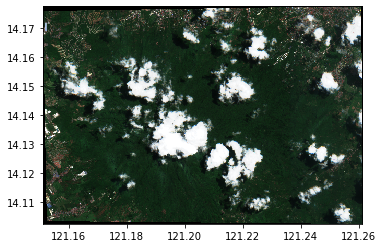

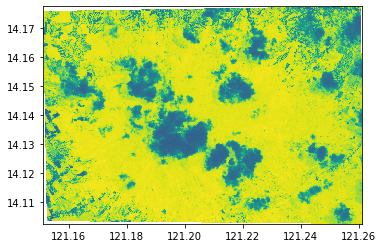

In [2]:
makiling_file = 'makiling.tiff'
makiling_ndvi_file = 'makiling_ndvi.tiff'

makiling = rs.open(makiling_file)
makiling_ndvi = rs.open(makiling_ndvi_file)
show(makiling) # true color 
show(makiling_ndvi) # ndvi

## Print basic info 

In [3]:
# No. of Bands 
print(makiling.count)

# Image resolution
print(makiling.height, makiling.width)

# Coordinate Reference System
print(makiling.crs)

3
430 613
EPSG:4326


## Convert to CSV format

Conversion to CSV is done one band at a time thus, looping through each band of an image produces a single CSV.

In [4]:
# create list of the number of bands of geotiff image
def n_bands_list(geotiff_file):
    open_geotiff = rs.open(geotiff_file)
    iterator = count(start=1, step= 1)
    n_bands = list(next(iterator)  for _ in range(open_geotiff.count)) 
    return n_bands

In [5]:
# loop through each band and output corresponding values and lng/lat to csv format
def get_coordinates_values(geotiff_file):
    file_name = geotiff_file[:geotiff_file.index('.')]
    for num in n_bands_list(geotiff_file):
        rtxyz = Raster2xyz()
        rtxyz.translate(geotiff_file, f'{file_name}-{num}.csv', n_band=num)

**Since the true color image is composed of three 3 bands, a CSV file of values with lng/lat coordinates for each band is generated**

In [6]:
get_coordinates_values(makiling_file)

[2021-01-30 07:36:53 - INFO] - Getting geotransform and data...
[2021-01-30 07:36:53 - INFO] - Getting XYZ data...
[2021-01-30 07:36:53 - INFO] - Getting geotransformed coordinates...
[2021-01-30 07:36:53 - INFO] - Building XYZ data...
[2021-01-30 07:36:55 - INFO] - New XYZ (csv file) created...
[2021-01-30 07:36:55 - INFO] - Getting geotransform and data...
[2021-01-30 07:36:55 - INFO] - Getting XYZ data...
[2021-01-30 07:36:55 - INFO] - Getting geotransformed coordinates...
[2021-01-30 07:36:55 - INFO] - Building XYZ data...
[2021-01-30 07:36:56 - INFO] - New XYZ (csv file) created...
[2021-01-30 07:36:56 - INFO] - Getting geotransform and data...
[2021-01-30 07:36:56 - INFO] - Getting XYZ data...
[2021-01-30 07:36:56 - INFO] - Getting geotransformed coordinates...
[2021-01-30 07:36:56 - INFO] - Building XYZ data...
[2021-01-30 07:36:58 - INFO] - New XYZ (csv file) created...


**Since the NDVI image contains 1 band, only a single CSV is produced.**

In [7]:
get_coordinates_values(makiling_ndvi_file)

[2021-01-30 07:36:58 - INFO] - Getting geotransform and data...
[2021-01-30 07:36:58 - INFO] - Getting XYZ data...
[2021-01-30 07:36:58 - INFO] - Getting geotransformed coordinates...
[2021-01-30 07:36:58 - INFO] - Building XYZ data...
[2021-01-30 07:37:00 - INFO] - New XYZ (csv file) created...
